# Here we are going to classify traffic sign images into 43 categories.
        * HERE WE WILL USE CNN TO CLASSIFY THIS TRAFFIC SIGN IMAGES. 

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import pickle
import matplotlib.pyplot as plt
import csv
from math import sqrt, ceil
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

/kaggle/input/traffic-signs-preprocessed/mean_image_gray.pickle
/kaggle/input/traffic-signs-preprocessed/data2.pickle
/kaggle/input/traffic-signs-preprocessed/data0.pickle
/kaggle/input/traffic-signs-preprocessed/std_gray.pickle
/kaggle/input/traffic-signs-preprocessed/data4.pickle
/kaggle/input/traffic-signs-preprocessed/data3.pickle
/kaggle/input/traffic-signs-preprocessed/test.pickle
/kaggle/input/traffic-signs-preprocessed/data8.pickle
/kaggle/input/traffic-signs-preprocessed/mean_image_rgb.pickle
/kaggle/input/traffic-signs-preprocessed/valid.pickle
/kaggle/input/traffic-signs-preprocessed/datasets_preparing.py
/kaggle/input/traffic-signs-preprocessed/data1.pickle
/kaggle/input/traffic-signs-preprocessed/data7.pickle
/kaggle/input/traffic-signs-preprocessed/data5.pickle
/kaggle/input/traffic-signs-preprocessed/std_rgb.pickle
/kaggle/input/traffic-signs-preprocessed/label_names.csv
/kaggle/input/traffic-signs-preprocessed/labels.pickle
/kaggle/input/traffic-signs-preprocessed/train

# Understanding of Data
    * Our data for training , validation and testing are in train.pickle , valid.pickle and test.pickle respectively hence we will use these three files to train our CNN model
        1. train.pickle
        2. valid.pickle
        3. test.pickle
* we will also use one more file in which our labels are stored.
        4. label_names.csv
 # so lets start...
  ## First we load our data and do preproccessing required.

In [60]:
train_data = '/kaggle/input/traffic-signs-preprocessed/train.pickle'
validate_data= '/kaggle/input/traffic-signs-preprocessed/valid.pickle'
test_data = '/kaggle/input/traffic-signs-preprocessed/test.pickle'
with open(train_data, mode='rb') as f:
    train = pickle.load(f)
with open(test_data, mode='rb') as f:
    test = pickle.load(f)
with open(validate_data, mode='rb') as f:
    valid = pickle.load(f)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
# y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)
# print(y_train.shape)
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

(34799, 32, 32, 3) (34799,) (4410, 32, 32, 3) (4410, 43) (12630, 32, 32, 3) (12630,)


In [61]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]
# n_classes = len(set(y_train))

print("training examples =", n_train)
print("validation examples=", X_valid.shape[0])
print("testing examples =", n_test)
# print("Number of output labels =", n_classes)

training examples = 34799
validation examples= 4410
testing examples = 12630


# Data visualizing
* Here we plot our labels with there label name to understand data and further precess it. 

In [62]:
figsize = plt.rcParams['figure.figsize']
label_names={}
with open('/kaggle/input/traffic-signs-preprocessed/label_names.csv', 'r') as file:
    temp = csv.reader(file)
    for i in temp:
        if i[0].isdigit():
            label_names[int(i[0])] = i[1]
n_classes = len(label_names)

In [63]:
def samples(features, labels):
    hist =[0 for i in range(n_classes)]
    sample = {}
    for i, l in enumerate(labels):
        hist[l] += 1
        if l not in sample:
            sample[l] = features[i]
    return hist, sample

In [64]:
def view(img, label=None):
    if label:
        print(balel_names[label])
    if len(img.shape) == 3 and img.shape[2] == 3:
        plt.imshow(img)
    else:
        plt.imshow(img.squeeze(), cmap='gray')

total features  34799 total classes 43
labels are as follows : 


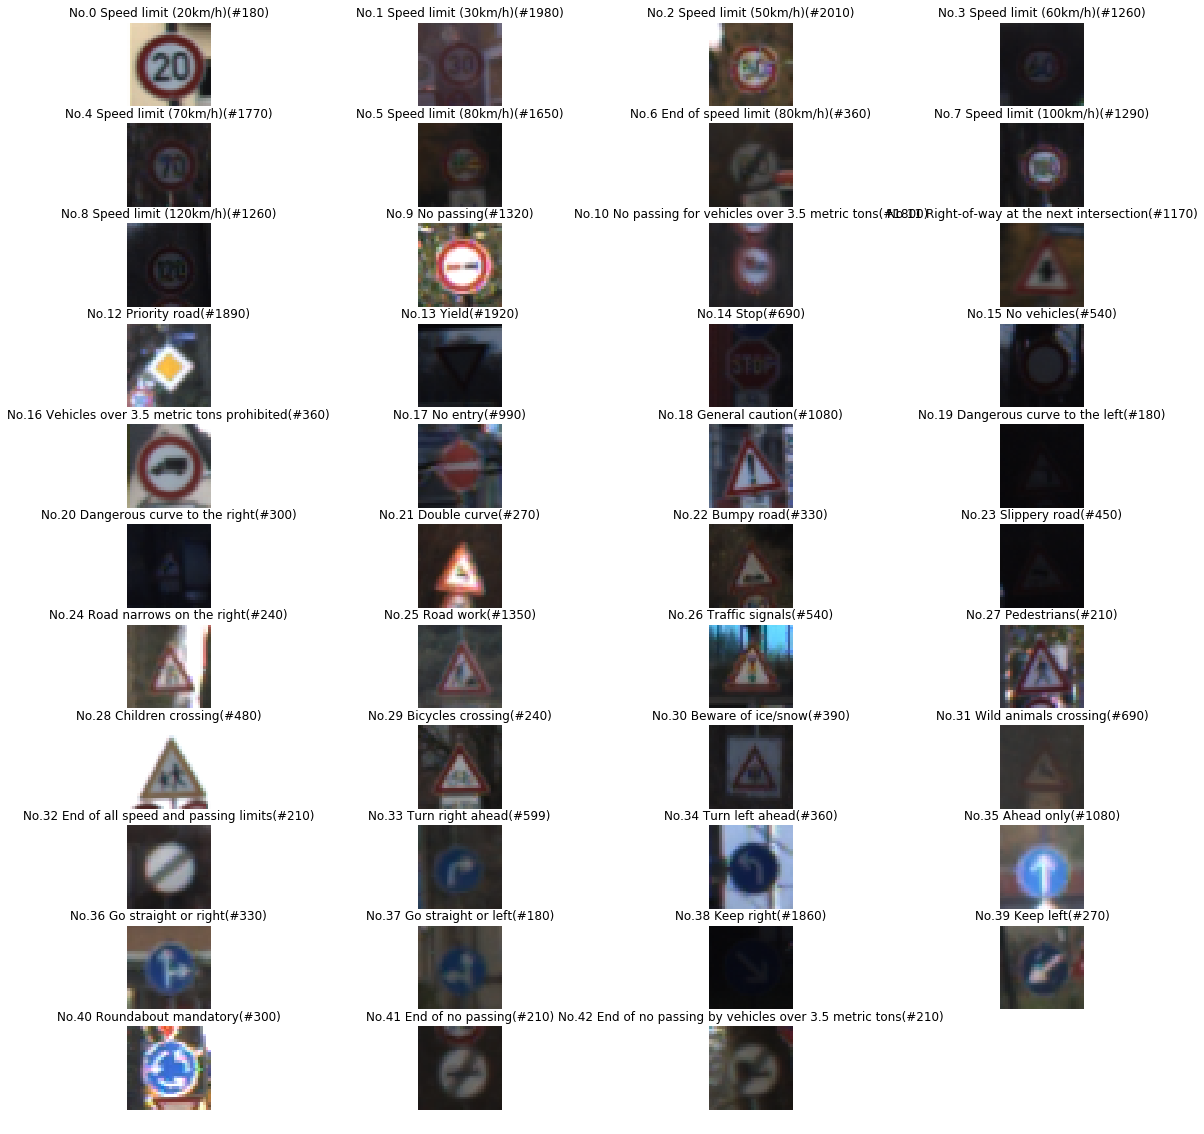

In [65]:
def data_viz(features, outputs):
    plt.rcParams['figure.figsize'] = (20, 20)
    hist1,sample = samples(features,outputs)
    n_classes = len(set(outputs))
    print('total features ',len(features),'total classes',n_classes)
    fig,axs = plt.subplots(nrows=11, ncols=4)
    i = 0
    print('labels are as follows : ')
    for raw in range(11):
        for col in range(4):
            ax = axs[raw][col]
            ax.axis('off')
            if i in sample:
                ax.imshow(sample[i])
            if i in label_names:
                ax.set_title("No.{} {}(#{})".format(i, label_names[i], hist1[i]), fontsize=12)
            i += 1
#     plt.rcParams['figure.figsize'] = fig
data_viz(X_train, y_train)

# Make Model
* Now we have been understand our data so lets make model for our data
* Here we will use keras sequencial model for train our data

In [66]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
#y_train=to_categorical(y_train)

# lets see how our model look like

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 4, 4, 64)         

# Lets train our model over training dataset and validate it through validation dataset

In [68]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

# print(X_train.shape)
# print(y_train.shape)
epochs = 15
history = model.fit(X_train,y_train, batch_size=128, epochs=epochs,validation_data=(X_valid, y_valid))
#history = model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

(34799, 32, 32, 3) (34799, 43) (4410, 32, 32, 3) (4410, 43) (12630, 32, 32, 3) (12630, 43)
Train on 34799 samples, validate on 4410 samples
Epoch 1/15
34799/34799 [==============================] - 123s 4ms/step - loss: 2.5883 - accuracy: 0.4781 - val_loss: 0.5259 - val_accuracy: 0.8814
Epoch 2/15
34799/34799 [==============================] - 125s 4ms/step - loss: 0.5080 - accuracy: 0.8578 - val_loss: 0.2066 - val_accuracy: 0.9469
Epoch 3/15
34799/34799 [==============================] - 123s 4ms/step - loss: 0.2717 - accuracy: 0.9242 - val_loss: 0.1111 - val_accuracy: 0.9744
Epoch 4/15
34799/34799 [==============================] - 123s 4ms/step - loss: 0.1876 - accuracy: 0.9470 - val_loss: 0.1001 - val_accuracy: 0.9732
Epoch 5/15
34799/34799 [==============================] - 126s 4ms/step - loss: 0.1576 - accuracy: 0.9571 - val_loss: 0.0922 - val_accuracy: 0.9764
Epoch 6/15
34799/34799 [==============================] - 132s 4ms/step - loss: 0.1334 - accuracy: 0.9651 - val_loss: 0.

# Now we will plot our model on its Accuracy and Loss

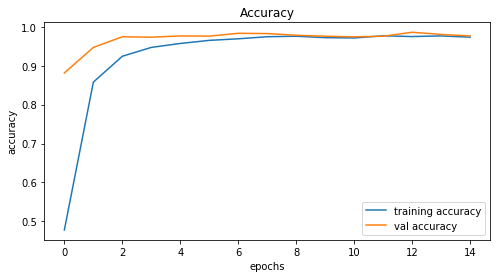

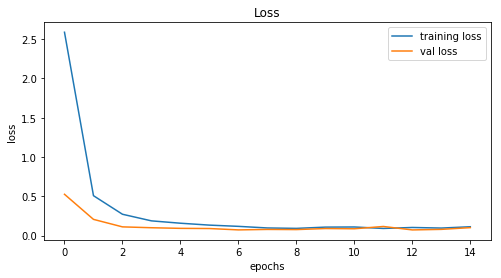

In [69]:
# print(history.history)
plt.figure(0,figsize=(8,4))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1,figsize=(8,4))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Save the Model

In [70]:
model.save('model.h5')

# Now lets check for different size of filters
## Here we will take filter sizes of:
1. (3*3)
2. (5*5)
3. (7*7)
4. (9*9)

In [71]:
filters = [3, 5, 7, 9]
models = [0] * len(filters)
for i in range(len(models)):
    models[i] = Sequential()
    models[i].add(Conv2D(filters=32, kernel_size=filters[i], activation='relu', input_shape=X_train.shape[1:]))
    models[i].add(Conv2D(filters=64, kernel_size=filters[i], activation='relu'))
    models[i].add(MaxPool2D(pool_size=(2, 2)))
    models[i].add(Dropout(rate=0.25))
    models[i].add(Flatten())
    models[i].add(Dense(256, activation='relu'))
    models[i].add(Dropout(rate=0.5))
    models[i].add(Dense(43, activation='softmax'))
    models[i].compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )

# lets train our model on different size of filters

In [72]:
hs = [0] * len(models)
epochs=5
for i in range(len(hs)):
    print('*******************   trained for ' + str (filters[i]) + ' * '+ str (filters[i]) + ' filter')
    hs[i] = models[i].fit(X_train,y_train, batch_size=128, epochs=epochs,validation_data=(X_valid, y_valid))

*******************   trained for 3 * 3 filter
Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 87s 3ms/step - loss: 2.8029 - accuracy: 0.5856 - val_loss: 0.4905 - val_accuracy: 0.8680
Epoch 2/5
34799/34799 [==============================] - 80s 2ms/step - loss: 0.3136 - accuracy: 0.9122 - val_loss: 0.2891 - val_accuracy: 0.9154
Epoch 3/5
34799/34799 [==============================] - 80s 2ms/step - loss: 0.1681 - accuracy: 0.9541 - val_loss: 0.2226 - val_accuracy: 0.9460
Epoch 4/5
34799/34799 [==============================] - 80s 2ms/step - loss: 0.1156 - accuracy: 0.9672 - val_loss: 0.1773 - val_accuracy: 0.9551
Epoch 5/5
34799/34799 [==============================] - 80s 2ms/step - loss: 0.0869 - accuracy: 0.9756 - val_loss: 0.1845 - val_accuracy: 0.9508
*******************   trained for 5 * 5 filter
Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 112s 3ms/step - loss:

# Here we will plot how our model perform over different sizes of filters

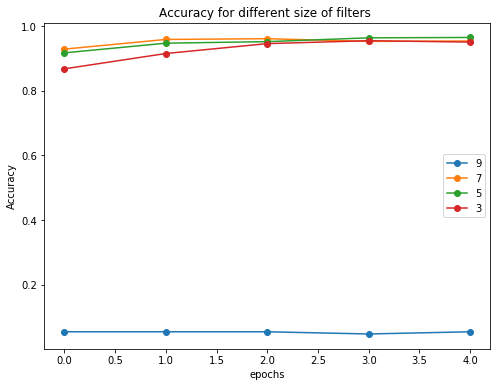

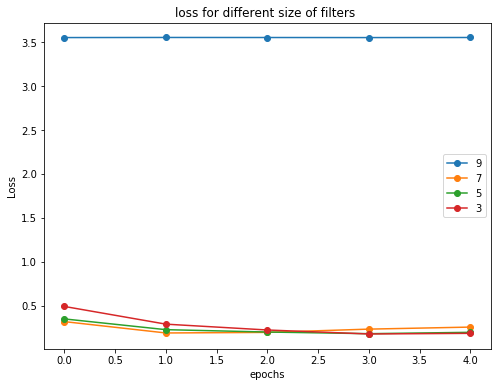

In [73]:
fig=plt.figure(figsize=(8,6))
plt.plot(hs[3].history['val_accuracy'], '-o',label=filters[3])
plt.plot(hs[2].history['val_accuracy'], '-o',label=filters[2])
plt.plot(hs[1].history['val_accuracy'], '-o',label=filters[1])
plt.plot(hs[0].history['val_accuracy'], '-o',label=filters[0])
plt.title('Accuracy for different size of filters ')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
fig=plt.figure(figsize=(8,6))
plt.plot(hs[3].history['val_loss'], '-o',label=filters[3])
plt.plot(hs[2].history['val_loss'], '-o',label=filters[2])
plt.plot(hs[1].history['val_loss'], '-o',label=filters[1])
plt.plot(hs[0].history['val_loss'], '-o',label=filters[0])
plt.title('loss for different size of filters ')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

# Now we'll see our trained weights for different sizes of filters 

In [74]:
from math import sqrt,ceil
def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid

(3, 3, 3, 32)
(32, 3, 3, 3)
(5, 5, 3, 32)
(32, 5, 5, 3)
(7, 7, 3, 32)
(32, 7, 7, 3)
(9, 9, 3, 32)
(32, 9, 9, 3)


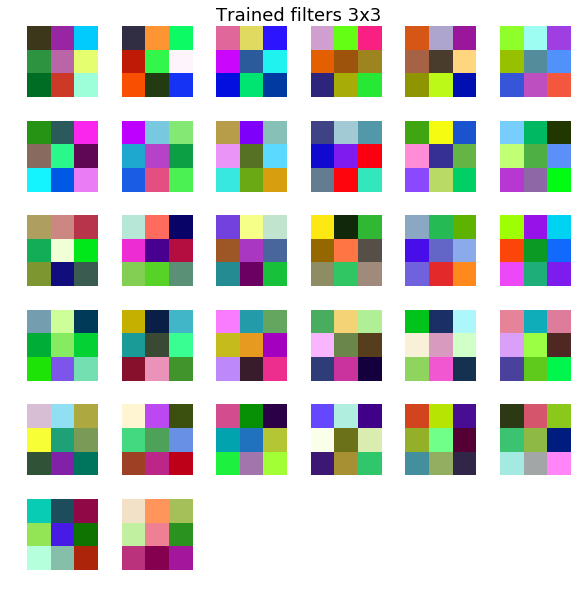

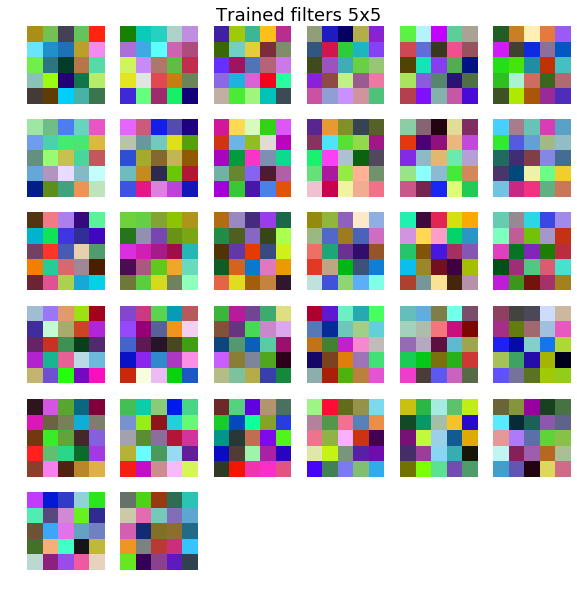

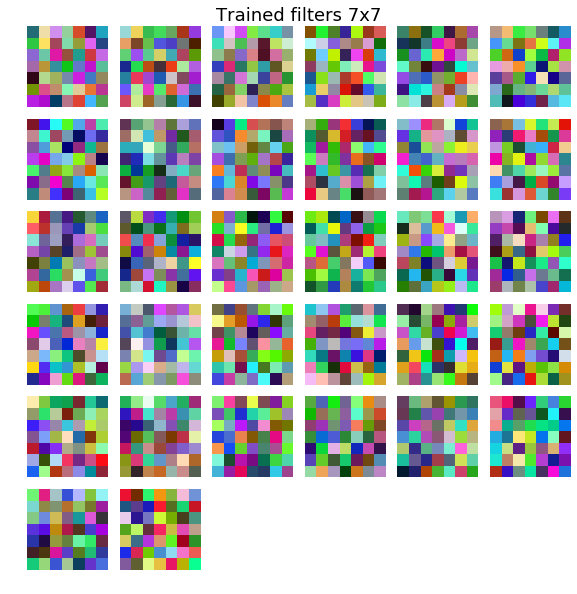

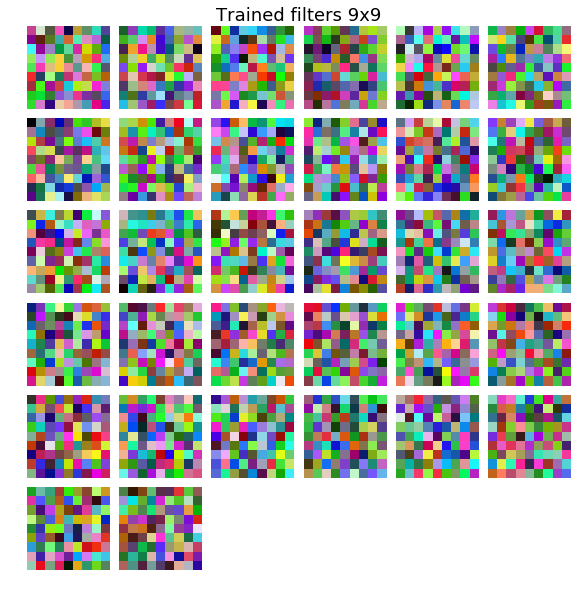

In [78]:
for i in range(len(models)):
    w = models[i].get_weights()
    print(w[0].shape)
    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape) 
    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)

# finally we save our models

In [76]:
for i in range(len(models)):
    t = 'model-' + str(filters[i]) + 'x' + str(filters[i]) + '.h5'
    models[i].save(t)